<a href="https://colab.research.google.com/github/idubey-code/cs480student/blob/main/CS480_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

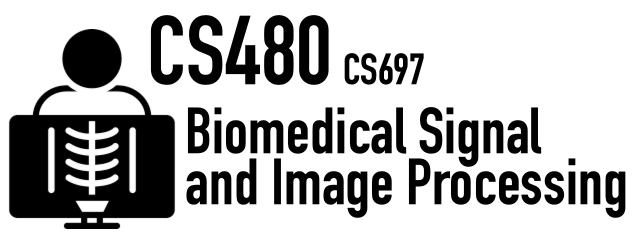
#Assignment 5

In [1]:
# In this assignment, we will visualize and explore a CT scan!

In [2]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# we are using pydicom, so lets install it!
!pip install pydicom

**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [4]:
# Please download https://cs480.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [5]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [6]:
# TODO: YOUR_ANSWER

There are 220 slices in the data.

In [7]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

# Axial

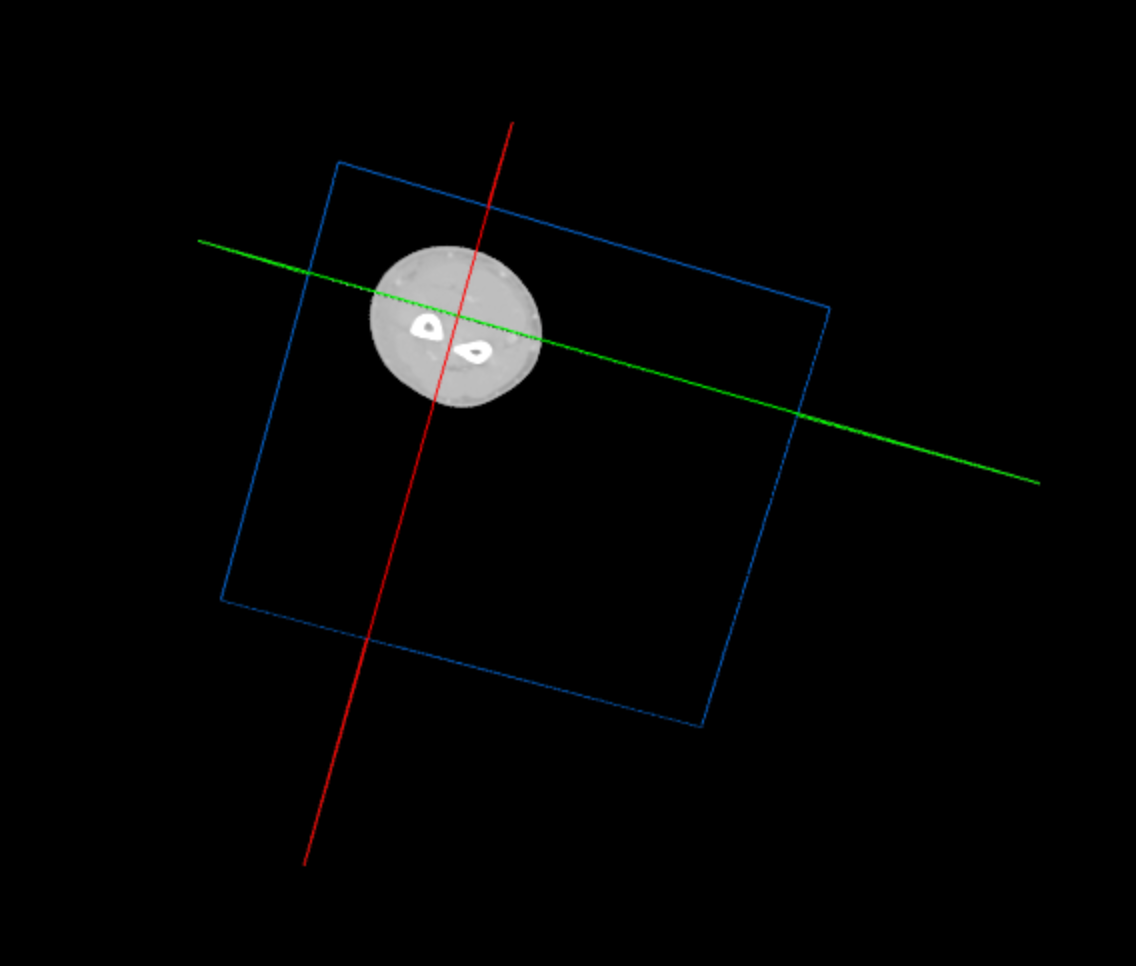

# Sagittal

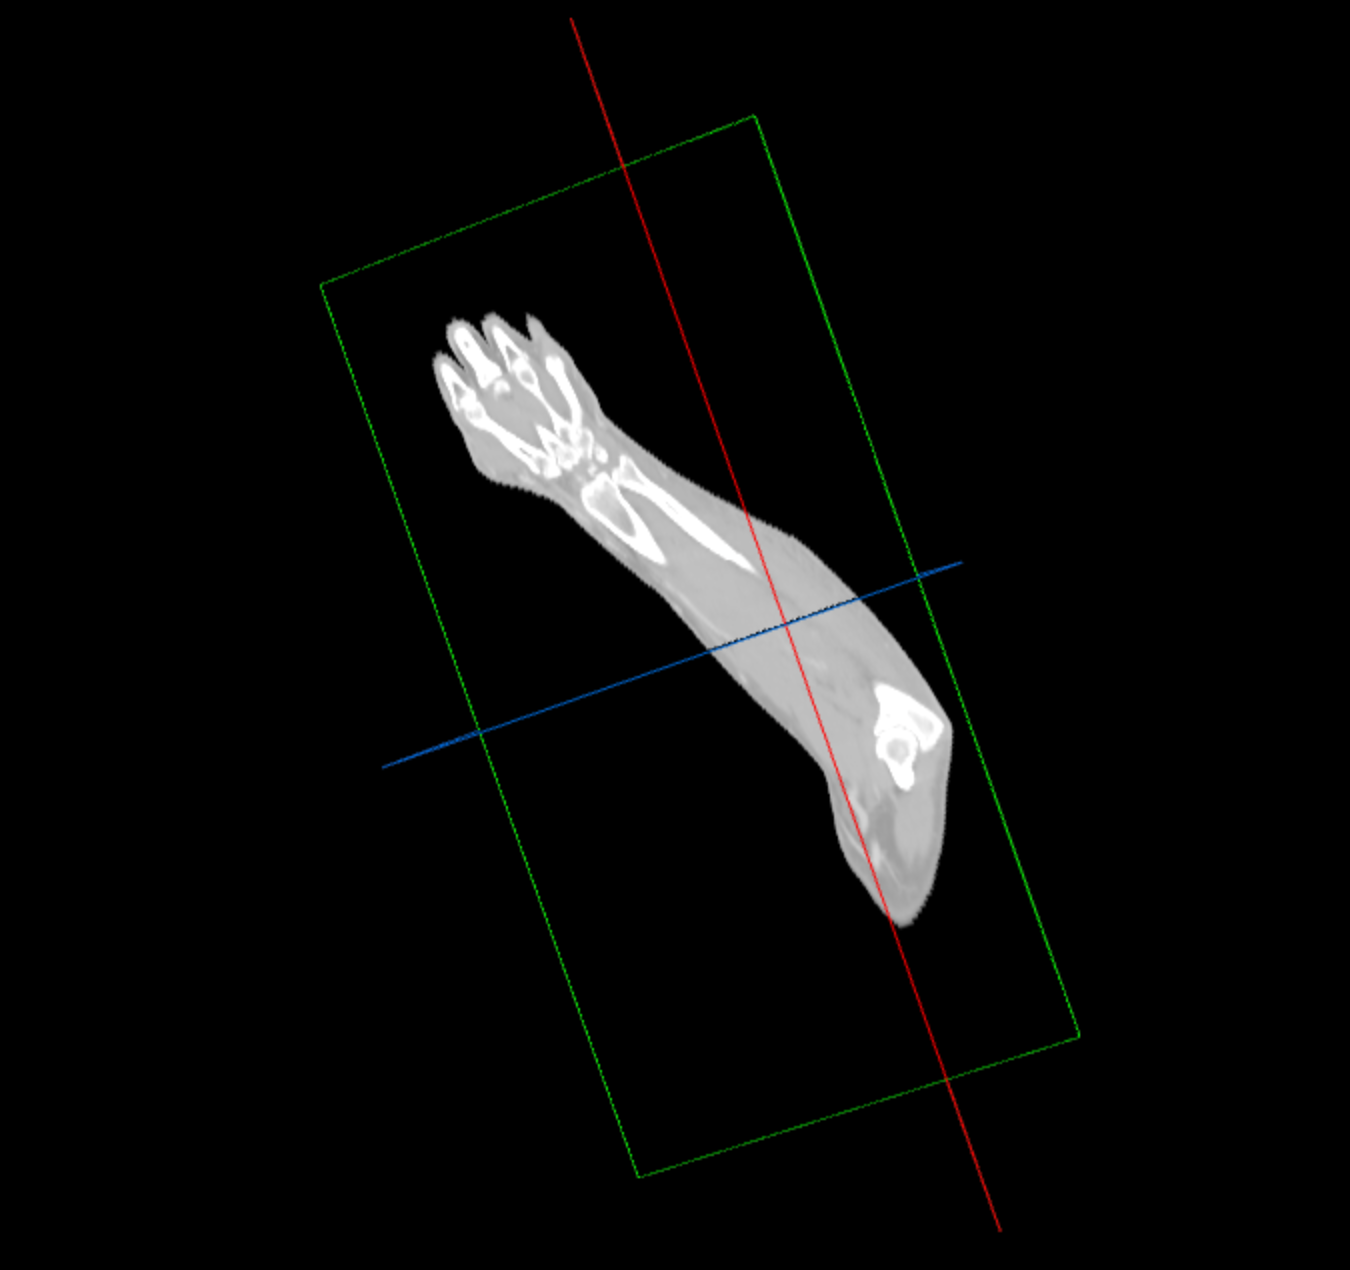

# Coronal

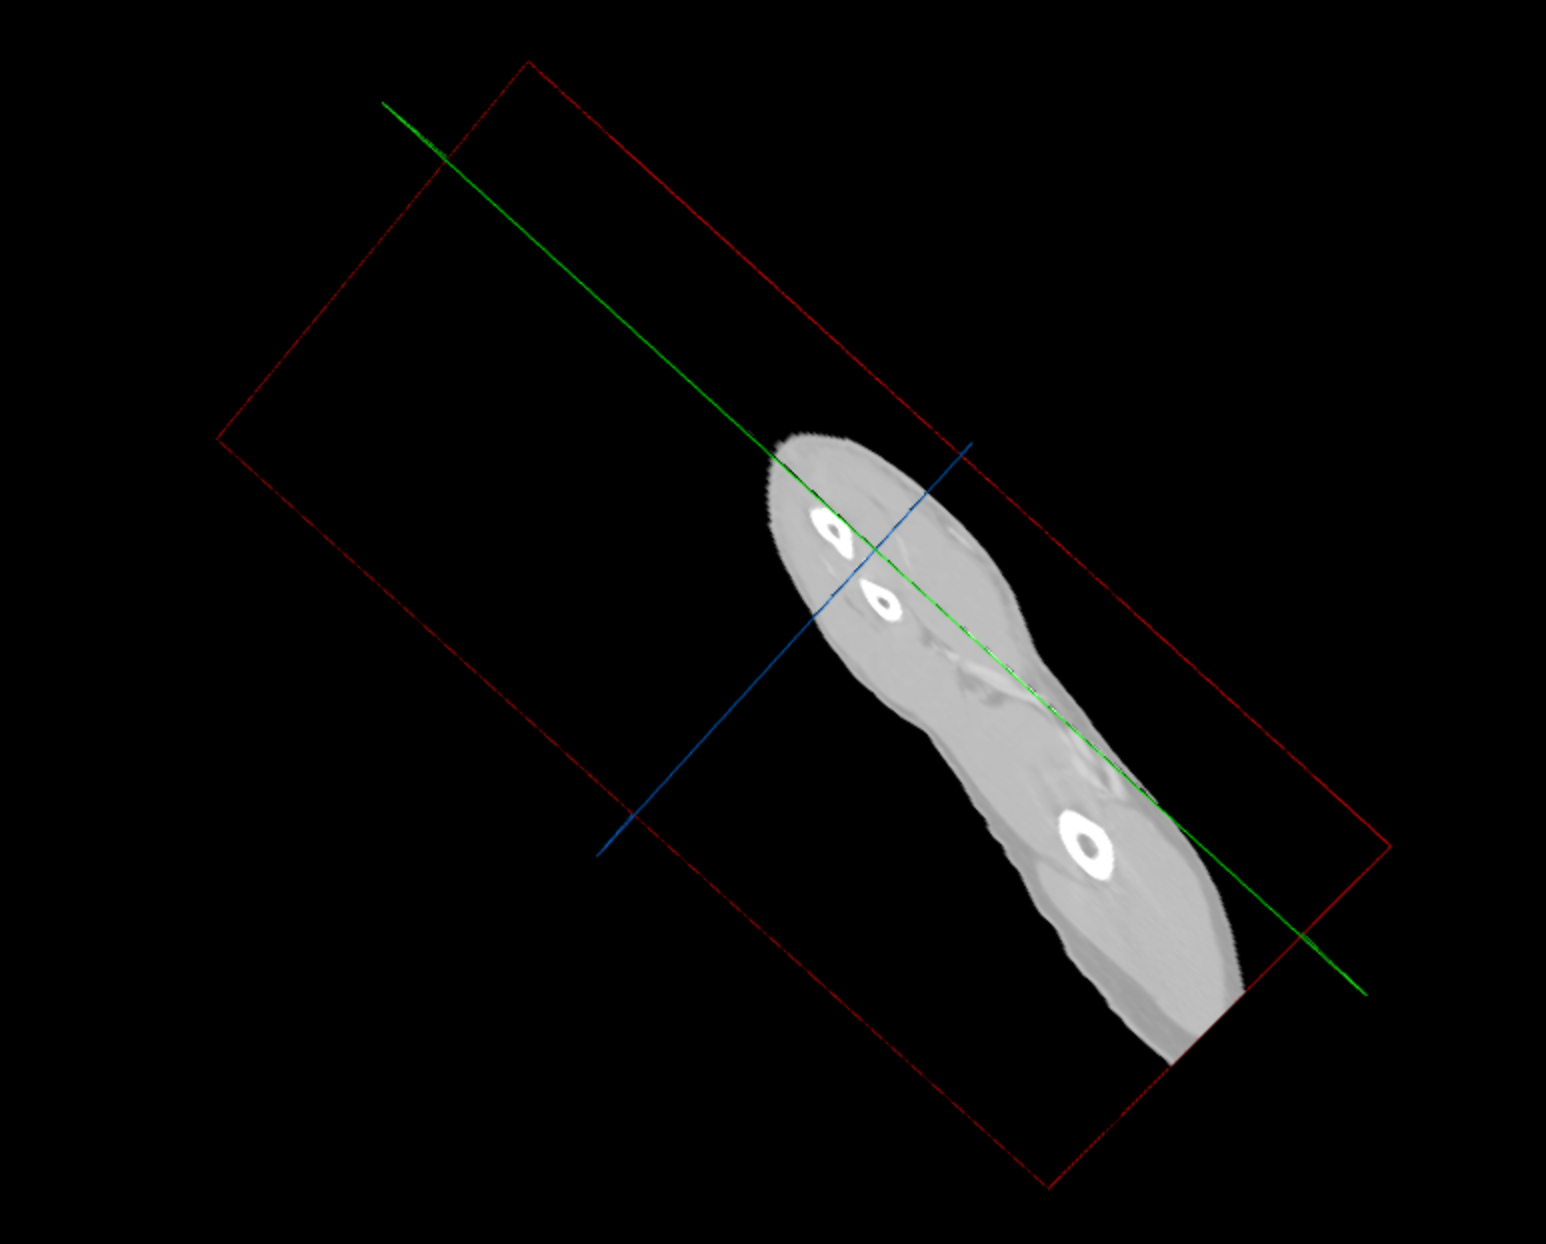

In [8]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

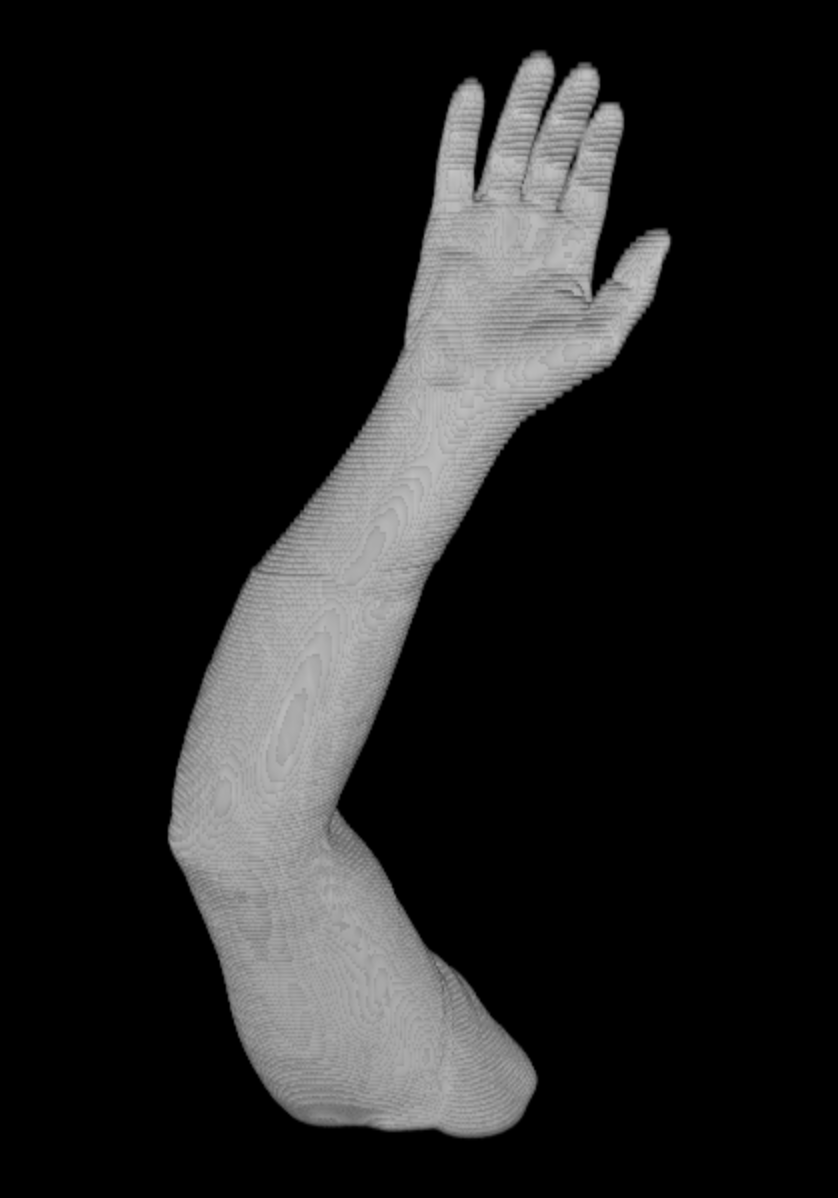

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [9]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [10]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [11]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [12]:
from pydicom import dcmread
import os
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY

slice_list = os.listdir("ct")
slice_list.sort()

slice_shape = dcmread("ct/"+slice_list[0]).pixel_array.shape

slice_array = np.zeros((len(slice_list),slice_shape[0],slice_shape[1]))

for i in range(len(slice_list)):
  slice_array[i,0:slice_shape[0],0:slice_shape[1]] = dcmread("ct/"+slice_list[i]).pixel_array

In [14]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

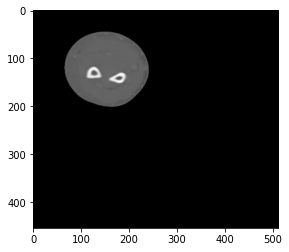

In [15]:
# TODO: YOUR CODE FOR AXIAL

plt.imshow(slice_array[len(slice_list)//2,:,:],cmap='gray');

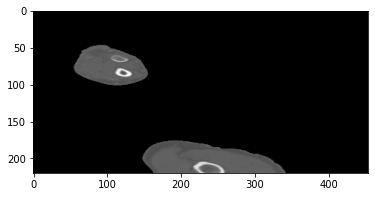

In [16]:
# TODO: YOUR CODE FOR SAGITTAL

plt.imshow(slice_array[:,:,slice_shape[1]//2],cmap='gray');

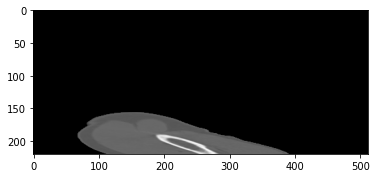

In [17]:
# TODO: YOUR CODE FOR CORONAL

plt.imshow(slice_array[:,slice_shape[0]//2,:],cmap='gray');

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [18]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [19]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

Window Center: 30
Window Width: 410



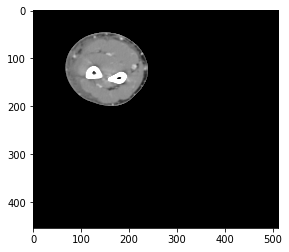

In [20]:
# TODO: YOUR CODE

axialSlice = dcmread("ct/"+slice_list[110])
winCenter = axialSlice.WindowCenter
winWidth = axialSlice.WindowWidth

print(f'Window Center: {winCenter}\nWindow Width: {winWidth}\n')

hu_pixels = axialSlice.pixel_array
rescale = axialSlice.RescaleIntercept

vmin = winCenter - winWidth/2
vmax = winCenter + winWidth/2
plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [21]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

New Window Center: 30
New Window Width: 200



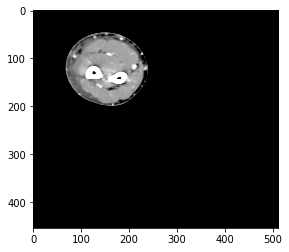

In [22]:
# TODO: YOUR CODE

# Used the below loop to test various values for Window Width.
# The best visualization came for Window Width = 200
# for winWidth in range(100,501,50):
#   print(winWidth)
#   vmin = winCenter - winWidth/2
#   vmax = winCenter + winWidth/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

# Using Window Width = 200, values for Window Center were tried.
# The visualization clarity decreases once the value was increased.
# Thus, Window Center = 30 works best.
# for winWidth in range(100,501,50):
#   print(winWidth)
#   vmin = winCenter - 200/2
#   vmax = winCenter + 200/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

newWindowCenter = 30
newWindowWidth = 200

print(f'New Window Center: {newWindowCenter}\nNew Window Width: {newWindowWidth}\n')

newVmin = newWindowCenter - newWindowWidth/2
newVmax = newWindowCenter + newWindowWidth/2
plt.imshow(hu_pixels + rescale, cmap='gray', vmin=newVmin, vmax=newVmax)
plt.show()

In [23]:
# Which values make sense and why?

In [24]:
# TODO: YOUR ANSWER

The values window center = 30 and Window width = 200 make sense and is giving good visualization. Keeping the center at 30 is giving balanced brightness and all the structures are clearly visible. Increasing the value is making the slice darker and soft tissues are becoming invisible. Window width is also kept narrow so that examining can be improved. Making it too wide can make details obscure by reducing small effects between soft tissues.

---



**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [25]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

In [26]:
new_slice_array = np.zeros((len(slice_list),slice_shape[0],slice_shape[1]))

for i in range(len(slice_list)):
  tempSlice = dcmread("ct/"+slice_list[i])
  tempPixels = tempSlice.pixel_array
  tempSlope = tempSlice.RescaleSlope
  tempIntercept = tempSlice.RescaleIntercept
  tempImage = tempPixels * tempSlope + tempIntercept
  new_slice_array[i,0:slice_shape[0],0:slice_shape[1]] = tempImage

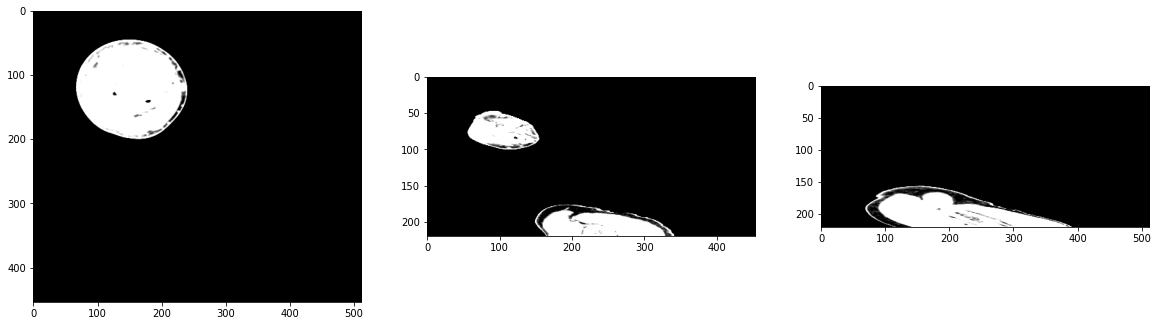

In [27]:
# TODO: YOUR CODE TO SEGMENT FAT

from IPython.core.pylabtools import figsize
fatMask = new_slice_array.copy()

fmin = (-60) - (-100/2)
fmax = (-60) + (-100/2)

fatMask = np.int16(fatMask)
fatMask[fatMask > fmin] = fmin
fatMask[fatMask < fmax] = fmax

fig, axs = plt.subplots(1,3,figsize=(20,20))

axs[0].imshow(fatMask[len(slice_list)//2,:,:],cmap='gray');
axs[1].imshow(fatMask[:,:,slice_shape[1]//2],cmap='gray');
axs[2].imshow(fatMask[:,slice_shape[0]//2,:],cmap='gray');

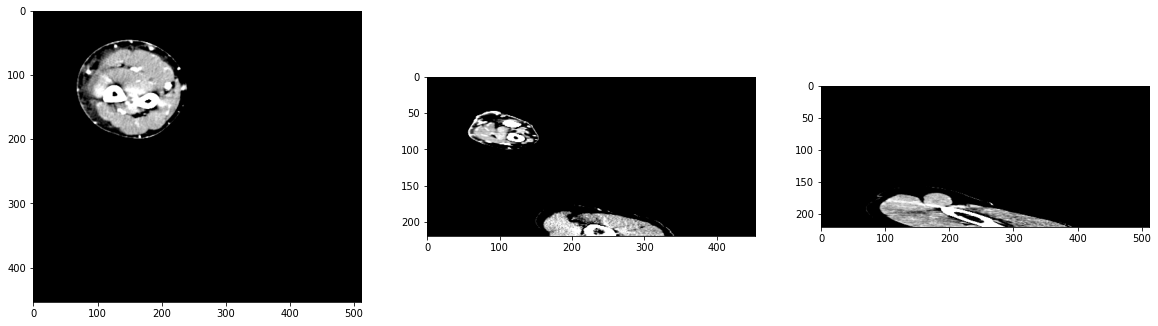

In [28]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE

tissueMask = new_slice_array.copy()

fmin = (40) - (80)/2
fmax = (40) + (80)/2

tissueMask = np.int16(tissueMask)
tissueMask[tissueMask < fmin] = fmin
tissueMask[tissueMask > fmax] = fmax

fig, axs = plt.subplots(1,3,figsize=(20,20))

axs[0].imshow(tissueMask[len(slice_list)//2,:,:],cmap='gray');
axs[1].imshow(tissueMask[:,:,slice_shape[1]//2],cmap='gray');
axs[2].imshow(tissueMask[:,slice_shape[0]//2,:],cmap='gray');

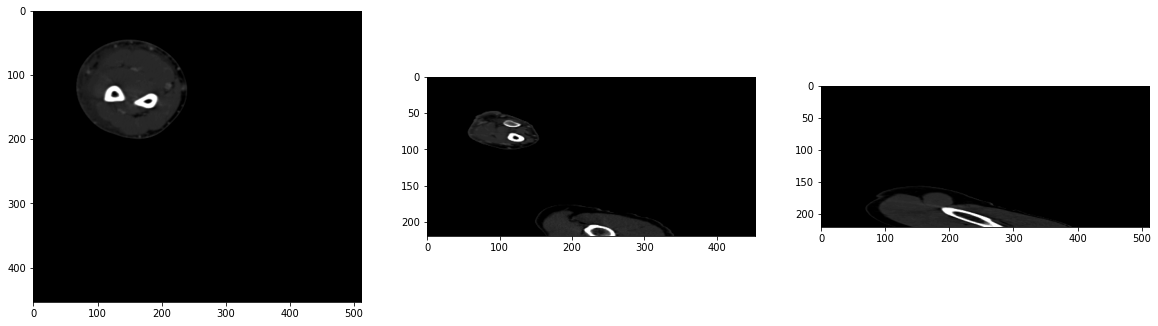

In [29]:
# TODO: YOUR CODE TO SEGMENT BONES

boneMask = new_slice_array.copy()

fmin = (400) - (1000)/2
fmax = (400) + (1000)/2

boneMask = np.int16(boneMask)
boneMask[boneMask < fmin] = fmin
boneMask[boneMask > fmax] = fmax

fig, axs = plt.subplots(1,3,figsize=(20,20))

axs[0].imshow(boneMask[len(slice_list)//2,:,:],cmap='gray');
axs[1].imshow(boneMask[:,:,slice_shape[1]//2],cmap='gray');
axs[2].imshow(boneMask[:,slice_shape[0]//2,:],cmap='gray');

In [30]:
# Are the segmentations good?

In [31]:
# TODO: YOUR ANSWER

The segmentations are good because on thresholding, the structures are getting highlighted accurately. We can see that when one structure is highlighted the visibility of the other two structures is very less making examining efficient. This is true for fat, soft tissue and bones.

---


# References



*   https://vincentblog.xyz/posts/medical-images-in-python-computed-tomography
*   https://pydicom.github.io/pydicom/dev/auto_examples/image_processing/reslice.html
*   https://pydicom.github.io/pydicom/stable/



In [32]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""